In [2]:
cd C:\Users\mifab\Documents\GitHub\-remote-healthcare-monitoring

C:\Users\mifab\Documents\GitHub\-remote-healthcare-monitoring


# Exploratory Data Analysis
## Marcos Fabietti
### 29/08/2024

We will explore the data provided in the TIHM Dataset, available at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10492790/

## Packages and Functions

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Demographics

In [10]:
df_Demographics=pd.read_csv("./Dataset/Demographics.csv")
df_Demographics.head()

,patient_id,age,sex
0,b9d58,"(70, 80]",Female
1,c55f8,"(80, 90]",Female
2,16f4b,"(80, 90]",Male
3,fd100,"(90, 110]",Female
4,1fbe4,"(80, 90]",Male


### Number of patients

In [16]:
print("number of patients are: ", df_Demographics.patient_id.nunique())

number of patients are:  56


### Gender Proportion

<AxesSubplot:ylabel='gender proportion'>

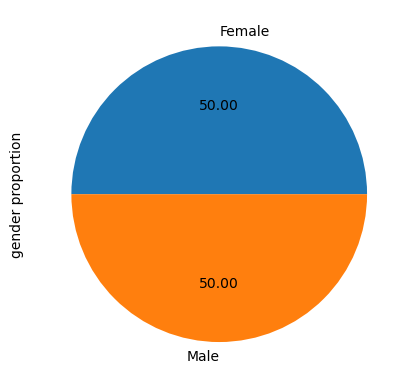

In [31]:
df_Demographics.groupby('sex').size().plot(kind='pie', autopct='%.2f',ylabel="gender proportion")

### Age distribution

<AxesSubplot:ylabel='age'>

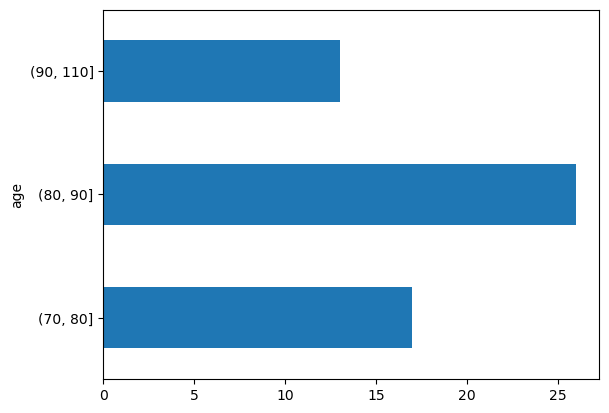

In [32]:
df_Demographics.groupby('age').size().plot(kind='barh')

## Activity

In [9]:
df_Activity=pd.read_csv("./Dataset/Activity.csv")
df_Activity.head()

,patient_id,location_name,date
0,0697d,Fridge Door,2019-06-28 13:03:29
1,0697d,Kitchen,2019-06-28 13:11:44
2,0697d,Front Door,2019-06-28 13:13:50
3,0697d,Bedroom,2019-06-28 13:13:53
4,0697d,Fridge Door,2019-06-28 13:14:09


In [132]:
df_Activity_pivoted=df_Activity.pivot_table(columns='location_name',
                                      index='patient_id',
                                      values='location_name',
                                      aggfunc="count"
)

### Heatmap of Activity Normalised by Patient

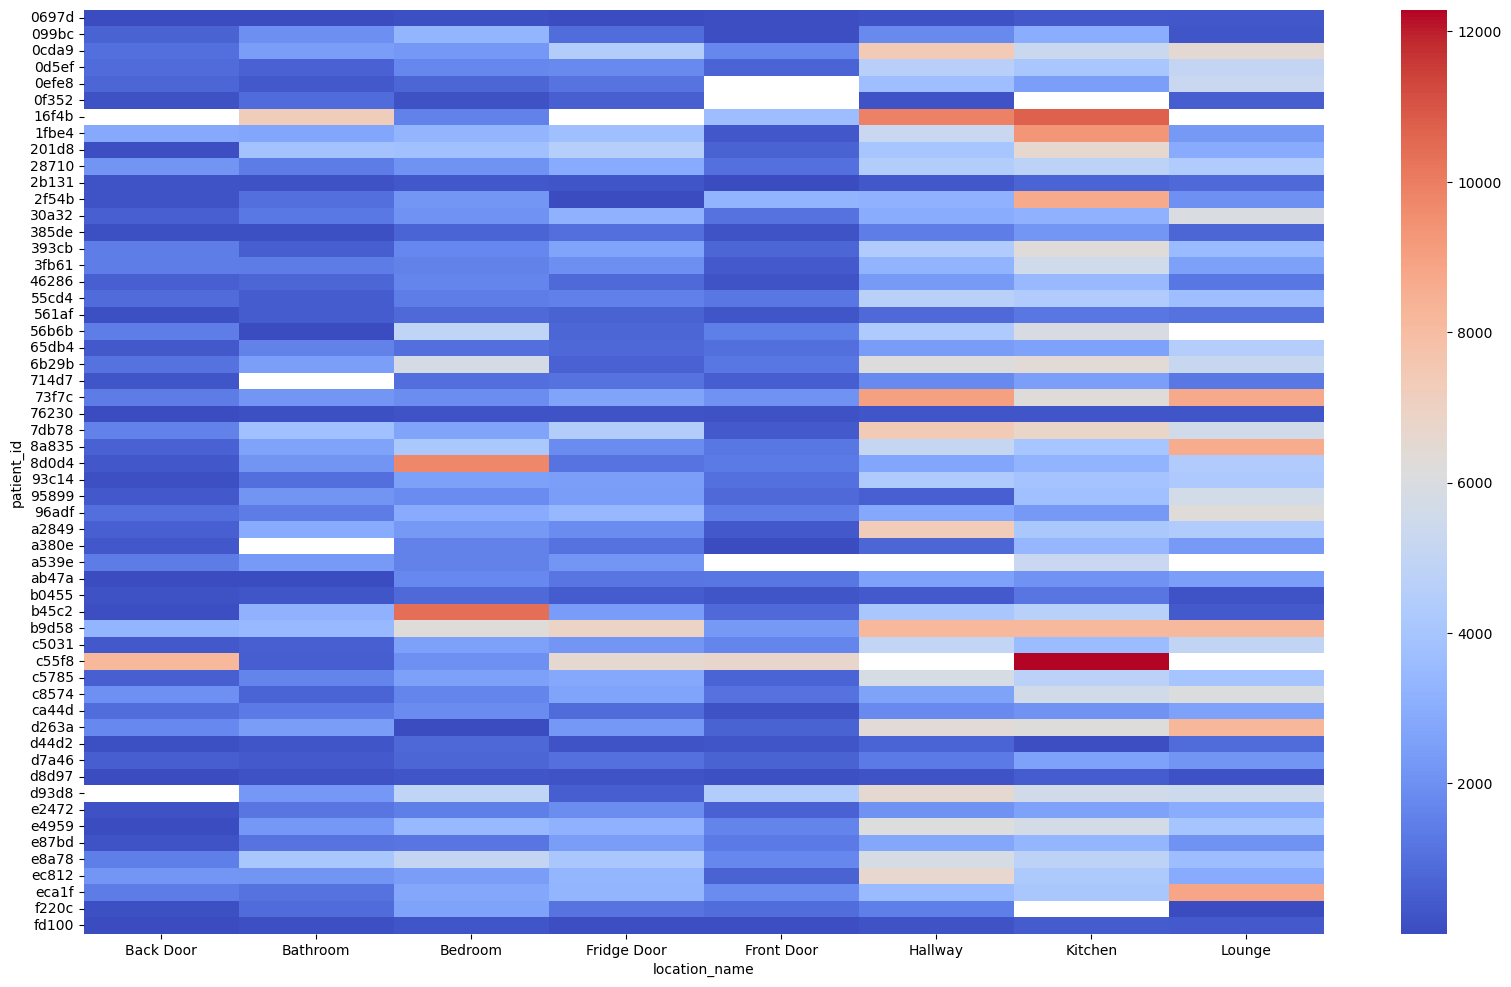

In [133]:
plt.figure(figsize=(20,12))
#df_Activity_pivoted_n =df_Activity_pivoted.div(df_Activity_pivoted.sum(axis=1), axis=0)
sns.heatmap(df_Activity_pivoted, cmap="coolwarm")
plt.show()

Hallway, Kitchen and Lounge appear to have most activity across all patients.

There appears to be outliers in Bedroom

### Scatterplot of activity throughout day for a patient

In [134]:
patient_id_select='0cda9'

In [135]:
df_Activity_patient_only=df_Activity[df_Activity.patient_id==patient_id_select]
df_Activity_patient_only['date']=pd.to_datetime(df_Activity_patient_only['date'])
df_Activity_patient_only['date_only']=df_Activity_patient_only['date'].dt.date
df_Activity_patient_only['hour']=df_Activity_patient_only['date'].dt.hour

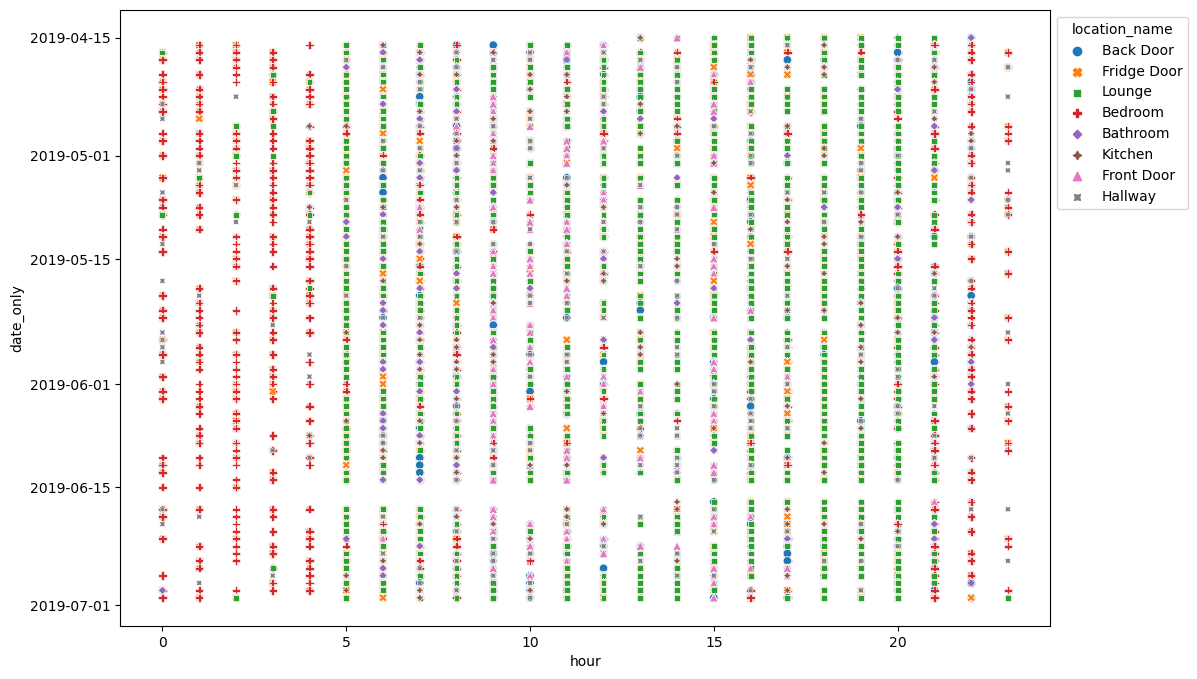

In [136]:
plt.figure(figsize=(12,8))
ax=sns.scatterplot(data=df_Activity_patient_only, x="hour", y="date_only", hue="location_name", style="location_name")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Patient '0cda9' does not exhibit erratic behaviour.

In [137]:
patient_id_select='8d0d4'

In [138]:
df_Activity_patient_only=df_Activity[df_Activity.patient_id==patient_id_select]
df_Activity_patient_only['date']=pd.to_datetime(df_Activity_patient_only['date'])
df_Activity_patient_only['date_only']=df_Activity_patient_only['date'].dt.date
df_Activity_patient_only['hour']=df_Activity_patient_only['date'].dt.hour

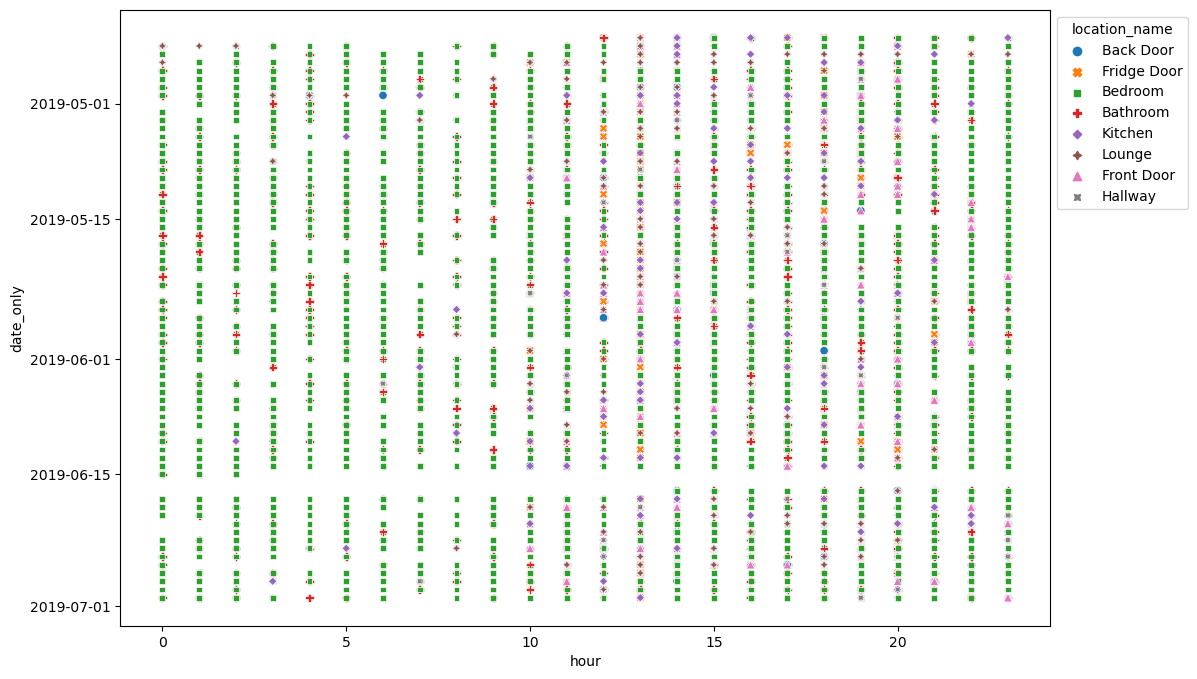

In [139]:
plt.figure(figsize=(12,8))
ax=sns.scatterplot(data=df_Activity_patient_only, x="hour", y="date_only", hue="location_name", style="location_name")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Patient '8d0d4' does exhibit erratic behaviour, staying most of his time in the bedroom and sporadically going to random parts of the house and back regardless of the hour of the day.

## Sleep

In [12]:
df_Sleep=pd.read_csv("./Dataset/Sleep.csv")
df_Sleep.head()

,patient_id,date,state,heart_rate,respiratory_rate,snoring
0,0f352,2019-06-25 22:53:00,AWAKE,69.0,14.0,False
1,0f352,2019-06-25 22:54:00,AWAKE,66.0,14.0,False
2,0f352,2019-06-25 22:55:00,AWAKE,70.0,14.0,False
3,0f352,2019-06-25 22:56:00,AWAKE,70.0,13.0,False
4,0f352,2019-06-25 22:57:00,AWAKE,68.0,13.0,False


We now look at the maximum heart rate across the different sleep states and in the noring/not snoring conditions (true/false).

NA values are not imputed as 0 as this may lead to wrong interpretations.

In [130]:
df_Sleep_g_hr=df_Sleep.pivot_table(columns=['state','snoring'],
                                      index='patient_id',
                                      values=['heart_rate'],
                                      aggfunc="max"
)

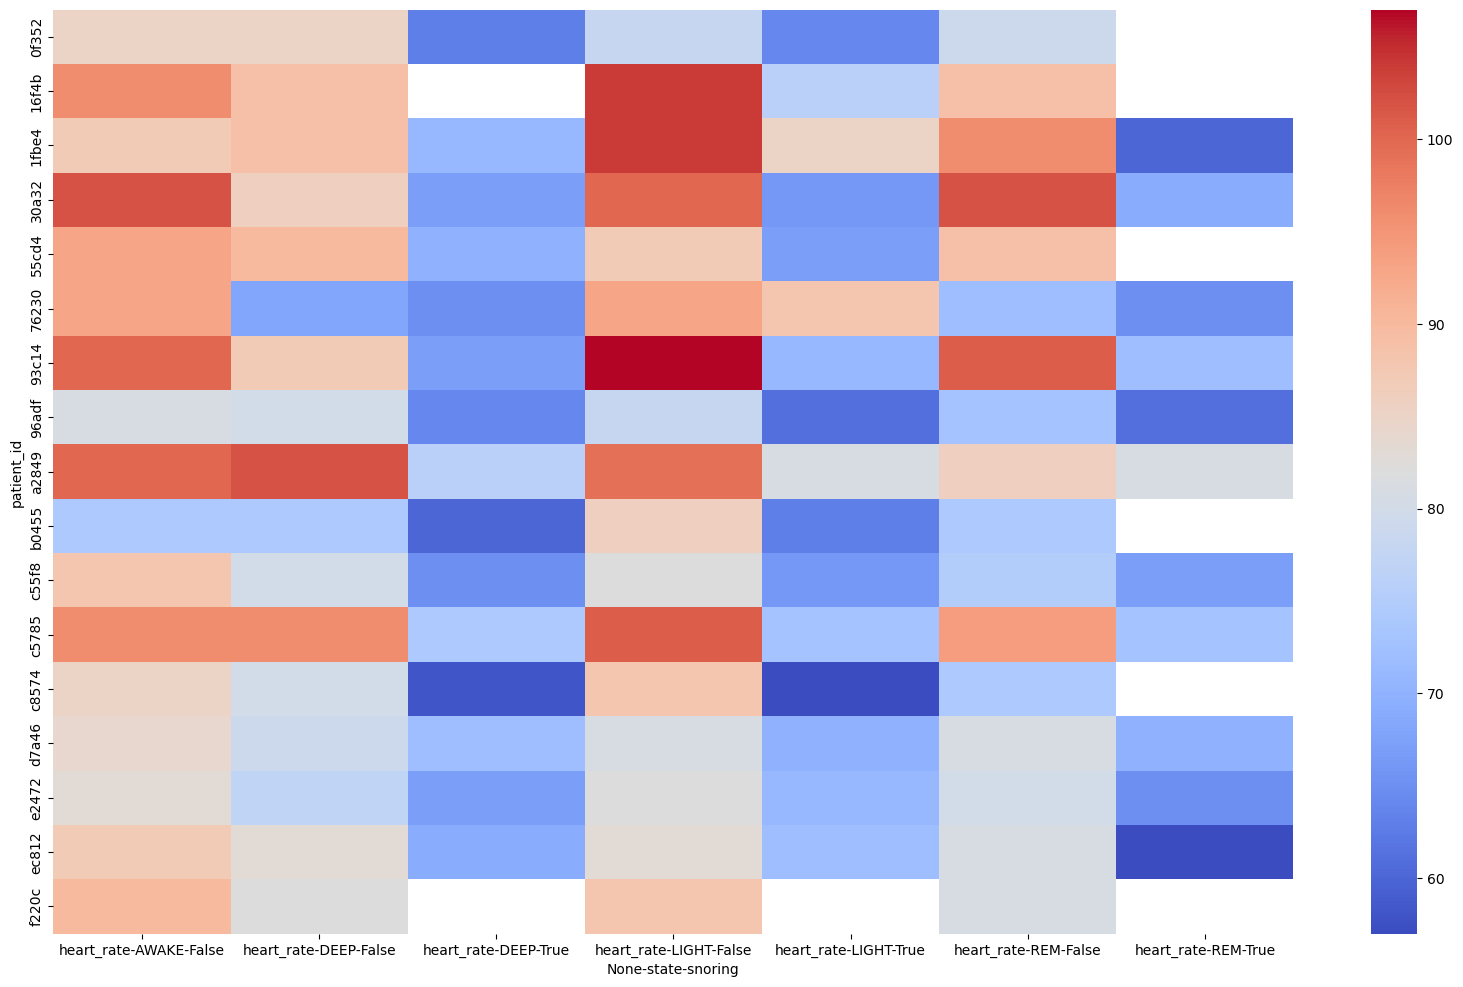

In [131]:
plt.figure(figsize=(20,12))
#df_Sleep_g =df_Sleep_g.div(df_Activity_pivoted.sum(axis=1), axis=0)
sns.heatmap(df_Sleep_g_hr, cmap="coolwarm")
plt.show()

We now do the same for the respiratory rate:

In [123]:
df_Sleep_g_resp=df_Sleep.pivot_table(columns=['state','snoring'],
                                      index='patient_id',
                                      values=['respiratory_rate'],
                                      aggfunc="max"
)

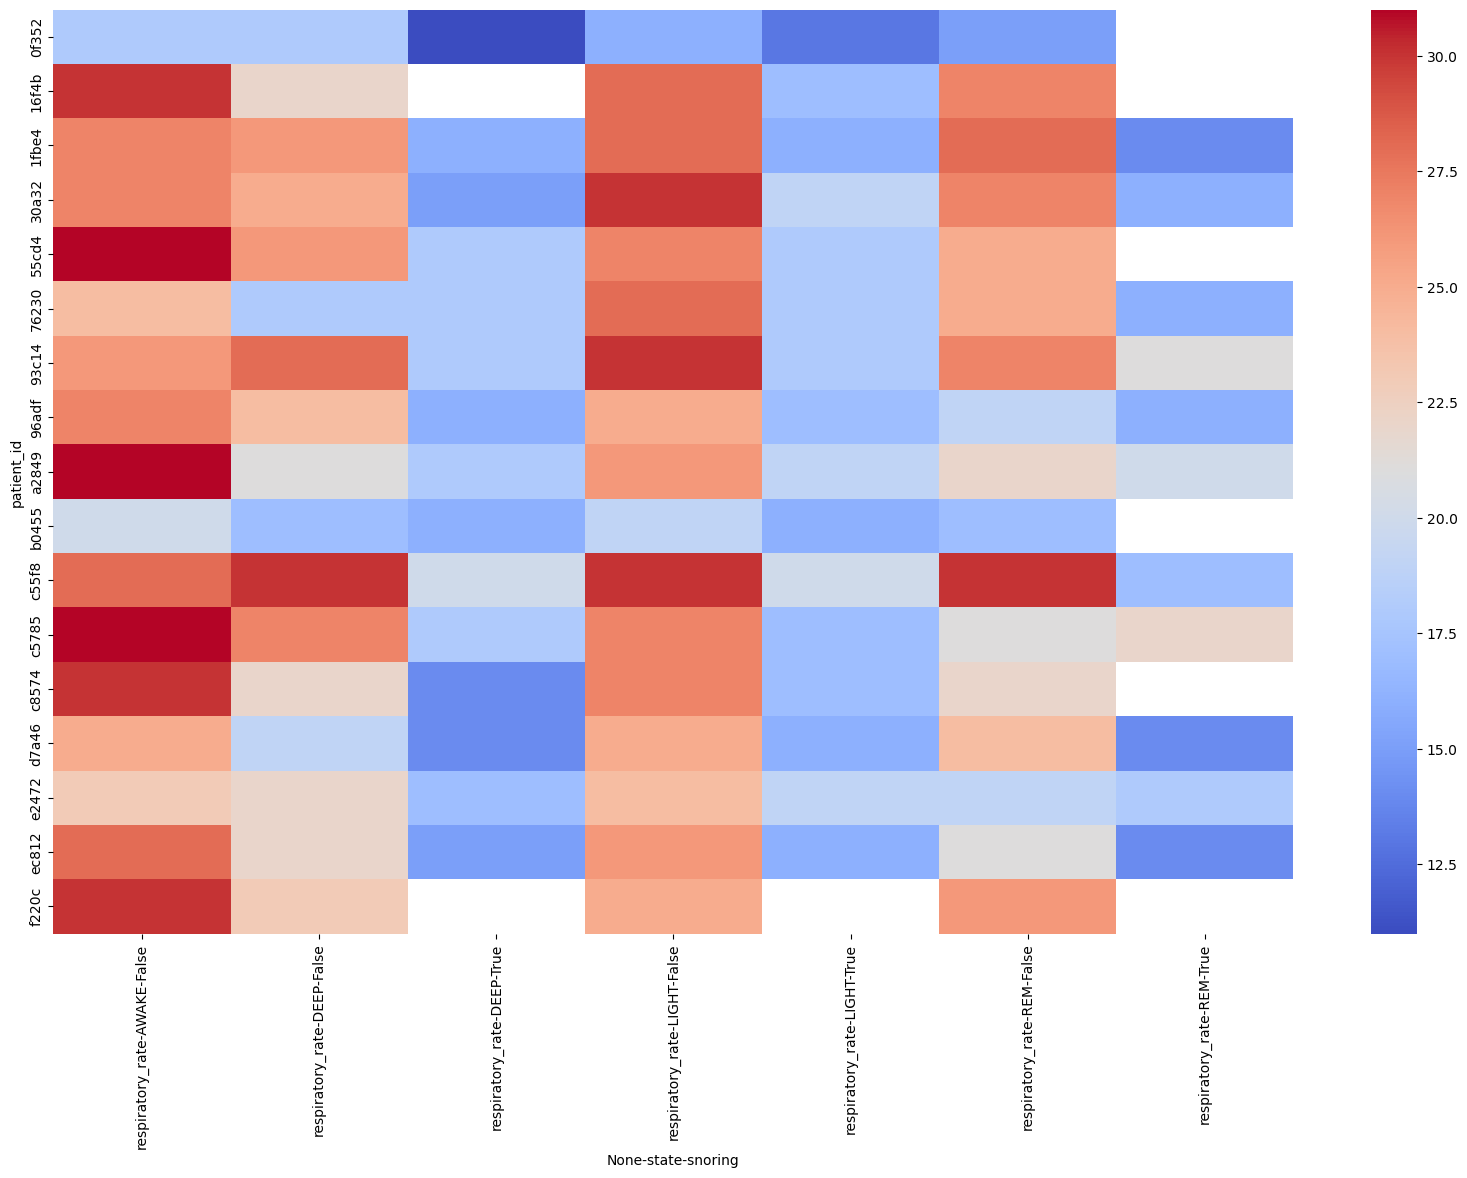

In [124]:
plt.figure(figsize=(20,12))
#df_Sleep_g =df_Sleep_g.div(df_Activity_pivoted.sum(axis=1), axis=0)
sns.heatmap(df_Sleep_g_resp, cmap="coolwarm")
plt.show()

## Physiology

In [219]:
df_Physiology=pd.read_csv("./Dataset/Physiology.csv")
df_Physiology.head()

,patient_id,date,device_type,value,unit
0,0697d,2019-06-28 13:42:09,Body Temperature,36.072,Cel
1,0697d,2019-06-28 13:42:44,Body Temperature,35.831,Cel
2,0697d,2019-06-28 13:43:40,Body Temperature,35.831,Cel
3,0697d,2019-06-28 13:45:15,Systolic blood pressure,165.000,mm[Hg]
4,0697d,2019-06-28 13:45:15,Diastolic blood pressure,82.000,mm[Hg]


join with the sleep dataset to get heart rate too.

In [220]:
df_Physiology.patient_id.unique()

array(['0697d', '099bc', '0d5ef', '0efe8', '0f352', '16f4b', '1fbe4',
       '201d8', '28710', '2b131', '2f54b', '30a32', '385de', '393cb',
       '3fb61', '46286', '55cd4', '561af', '56b6b', '65db4', '6b29b',
       '714d7', '73f7c', '76230', '7db78', '8a835', '8d0d4', '93c14',
       '95899', '96adf', 'a2849', 'a380e', 'a539e', 'ab47a', 'b0455',
       'b45c2', 'b9d58', 'c5031', 'c55f8', 'c5785', 'c8574', 'ca44d',
       'd263a', 'd44d2', 'd7a46', 'd8d97', 'd93d8', 'e2472', 'e4959',
       'e87bd', 'e8a78', 'ec812', 'eca1f', 'f220c', 'fd100'], dtype=object)

In [221]:
patient_id_select='a2849'

In [227]:
df_Physiology_com_patient_only=df_Physiology[df_Physiology.patient_id==patient_id_select]

In [228]:
heart_metrics=['Systolic blood pressure',
       'Diastolic blood pressure',
        'Heart rate']

In [229]:
df_Physiology_com_patient_only=df_Physiology_com_patient_only[df_Physiology_com_patient_only.device_type.isin(heart_metrics)]
df_Physiology_com_patient_only

,patient_id,date,device_type,value,unit
10148,a2849,2019-05-01 10:36:35,Systolic blood pressure,110.0,mm[Hg]
10149,a2849,2019-05-01 10:36:35,Diastolic blood pressure,57.0,mm[Hg]
10150,a2849,2019-05-01 10:36:35,Heart rate,63.0,beats/min
10166,a2849,2019-05-02 09:11:04,Systolic blood pressure,128.0,mm[Hg]
10167,a2849,2019-05-02 09:11:04,Diastolic blood pressure,75.0,mm[Hg]
...,...,...,...,...,...
10830,a2849,2019-06-28 08:58:14,Diastolic blood pressure,68.0,mm[Hg]
10831,a2849,2019-06-28 08:58:14,Heart rate,61.0,beats/min
10841,a2849,2019-06-29 10:20:43,Systolic blood pressure,89.0,mm[Hg]
10842,a2849,2019-06-29 10:20:43,Diastolic blood pressure,57.0,mm[Hg]


<AxesSubplot:xlabel='date', ylabel='value'>

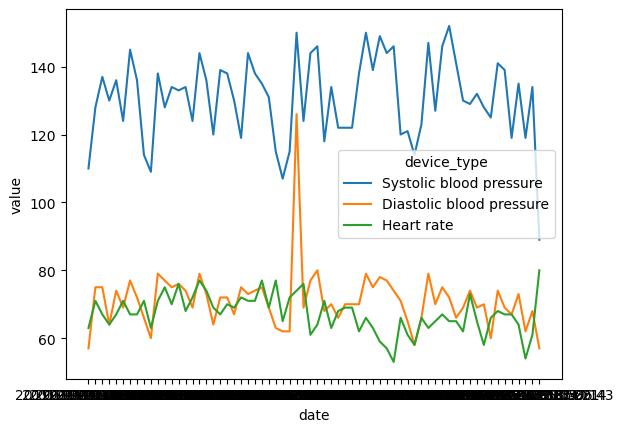

In [230]:
sns.lineplot(data=df_Physiology_com_patient_only,x='date',y='value',hue='device_type')

## Labels

In [11]:
df_Labels=pd.read_csv("./Dataset/Labels.csv")
df_Labels.head()

,patient_id,date,type
0,c55f8,2019-04-04 09:10:21,Blood pressure
1,16f4b,2019-04-08 13:40:20,Blood pressure
2,16f4b,2019-04-11 12:00:22,Agitation
3,ec812,2019-04-12 09:10:29,Blood pressure
4,16f4b,2019-04-14 12:00:07,Agitation


In [141]:
df_Labels.type.unique()

array(['Blood pressure', 'Agitation', 'Body water', 'Pulse', 'Weight',
       'Body temperature'], dtype=object)